# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
getTotal().tail(2) # check how recent this data is


,cases,deaths
date,,
2020-03-30,163680,2909
2020-03-31,187962,3631


In [5]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [6]:
def plotFitted(series, name="series", log=False): 
    print(f"Plotting {name}")
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=name)
    sbn.lineplot(x, base * np.exp(rate*x))

Plotting USA


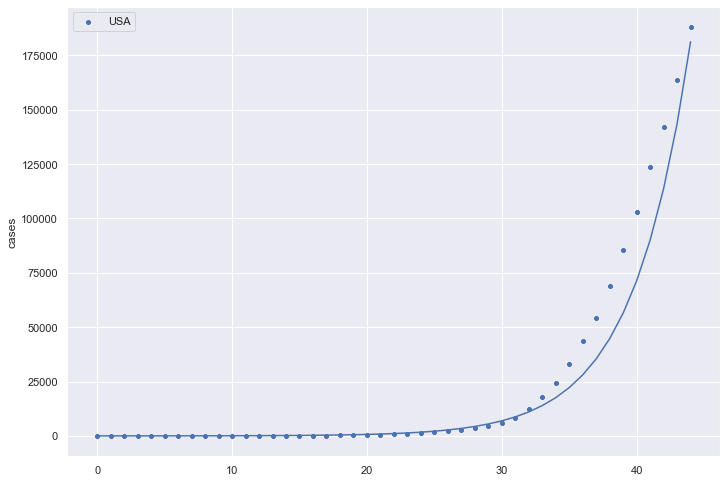

In [7]:
plotFitted(getTotal()["cases"][-45:], "USA")

In [8]:
def analyse(states=[], counties=[], n=30, col="cases"):
    names = ["USA total:"] + states + counties
    rates= []
    dfs = [getTotal()[col]] + [getState(s)[col] for s in states] + [getCounty(c)[col] for c in counties]
    for d, name in zip(dfs, names):
        print(f"Analysis for {name}")
        rate, base, n = fitExponential(d[-n:])
        rates.append(rate)
        print(f"exponential fitted with {n} points {col} = {np.round(base, 2)} * exp ({np.round(rate, 4)} * day)")
        print(f"day to day growth rate {np.round(100 * (np.exp(rate) - 1), 2)}%")
        print(f"days to doubling: {np.round(np.log(2)/rate, 2)}")
    x = np.arange(n)
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    for rate, name in zip(rates, names):
        sbn.lineplot(x, np.exp(rate*x), label=name)

    
    

Analysis for USA total:
exponential fitted with 30 points cases = 107.84 * exp (0.2733 * day)
day to day growth rate 31.42%
days to doubling: 2.54
Analysis for California
exponential fitted with 30 points cases = 38.8 * exp (0.1914 * day)
day to day growth rate 21.09%
days to doubling: 3.62
Analysis for Colorado
exponential fitted with 27 points cases = 5.89 * exp (0.2616 * day)
day to day growth rate 29.9%
days to doubling: 2.65
Analysis for San Francisco
exponential fitted with 27 points cases = 6.48 * exp (0.1662 * day)
day to day growth rate 18.09%
days to doubling: 4.17
Analysis for Boulder
exponential fitted with 18 points cases = 3.94 * exp (0.2234 * day)
day to day growth rate 25.03%
days to doubling: 3.1
Analysis for New York City
exponential fitted with 18 points cases = 395.69 * exp (0.3183 * day)
day to day growth rate 37.48%
days to doubling: 2.18


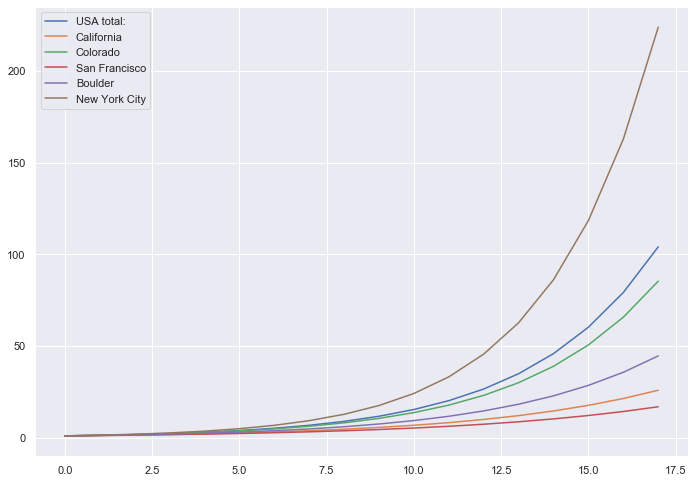

In [9]:
analyse(states=["California", "Colorado"], counties=["San Francisco", "Boulder", "New York City"])

Analysis for USA total:
exponential fitted with 30 points deaths = 5.58 * exp (0.2199 * day)
day to day growth rate 24.59%
days to doubling: 3.15
Analysis for California
exponential fitted with 28 points deaths = 0.73 * exp (0.2119 * day)
day to day growth rate 23.6%
days to doubling: 3.27
Analysis for Colorado
exponential fitted with 20 points deaths = 1.03 * exp (0.2179 * day)
day to day growth rate 24.35%
days to doubling: 3.18
Analysis for San Francisco
exponential fitted with 7 points deaths = 1.39 * exp (0.2887 * day)
day to day growth rate 33.47%
days to doubling: 2.4
Analysis for Boulder
exponential fitted with 5 points deaths = 0.87 * exp (0.1386 * day)
day to day growth rate 14.87%
days to doubling: 5.0
Analysis for New York City
exponential fitted with 5 points deaths = 493.04 * exp (0.2088 * day)
day to day growth rate 23.22%
days to doubling: 3.32


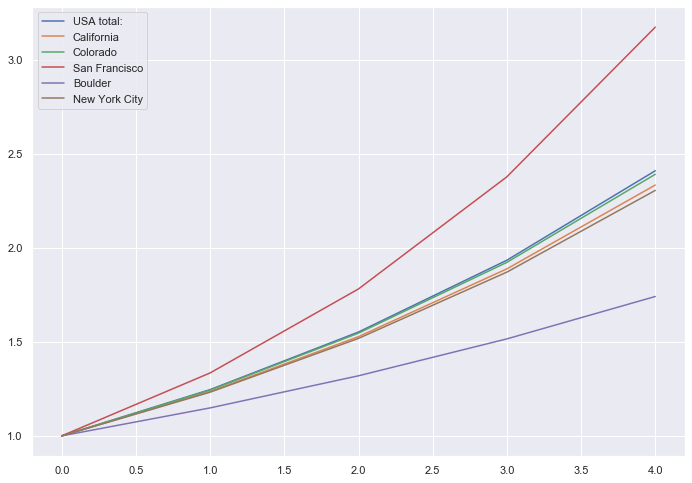

In [10]:
analyse(states=["California", "Colorado"], counties=["San Francisco", "Boulder", "New York City"], col="deaths")